### Import Library

In [400]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import warnings
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from scipy.stats import wilcoxon
from statsmodels.stats.weightstats import ztest


### Import Data

In [401]:
Persons= pd.read_csv('Persons.csv')
Persons_Germany = Persons.iloc[:,2:3]
Persons_Ireland = Persons.iloc[:,5:6]
Persons_Luxembourg = Persons.iloc[:,8:9]

In [402]:
Land_data= pd.read_csv('Land_data.csv')
Land_data.head()

Germany_hectares = Land_data.iloc[:,2:3]
Ireland_hectares = Land_data.iloc[:,5:6]
Luxembourg_hectares = Land_data.iloc[:,8:9]

In [403]:

FAO_Germany = FAOSTAT_data.iloc[:,2:3]
FAO_Ireland = FAOSTAT_data.iloc[:,5:6]
FAO_Luxembourg = FAOSTAT_data.iloc[:,8:9]

In [404]:
list_germany=[Persons_Germany,Germany_hectares,FAO_Germany]
df_Germany = pd.concat((list_germany),axis=1)
list_ireland=[Persons_Ireland,Ireland_hectares,FAO_Ireland]
df_Ireland = pd.concat((list_ireland),axis=1)
list_luxembourg= [Persons_Luxembourg,Luxembourg_hectares,FAO_Luxembourg]
df_Luxembourg = pd.concat((list_luxembourg),axis=1)

### Describing and Exploring Data

In [405]:
FAOSTAT_data.head()

,Area,Year,Value,Area.1,Year.1,Value.1,Area.2,Year.2,Value.2
0,Germany,2010,1709755,Ireland,2010,254794,Luxembourg,2010,7137
1,Germany,2011,2245973,Ireland,2011,372922,Luxembourg,2011,8611
2,Germany,2012,2750363,Ireland,2012,343886,Luxembourg,2012,9754
3,Germany,2013,2513116,Ireland,2013,365145,Luxembourg,2013,8292
4,Germany,2014,2331890,Ireland,2014,537874,Luxembourg,2014,7940


In [406]:
print("Shape of Data..:\n",FAOSTAT_data.shape)

Shape of Data..:
 (11, 9)


In [407]:
print("Columns in Datas are Types..:\n",FAOSTAT_data.dtypes)

Columns in Datas are Types..:
 Area       object
Year        int64
Value       int64
Area.1     object
Year.1      int64
Value.1     int64
Area.2     object
Year.2      int64
Value.2     int64
dtype: object


### Histplot
I plotted a univariate or bivariate histogram to show the distributions of the datasets.

The histogram is a classic visualization tool that represents the distribution of one or more variables by counting the number of observations that fall into separate boxes.

This function can normalize the statistic calculated at each bin to estimate the frequency, density or probability mass and add a smooth curve obtained using a kernel density estimation like the one below.

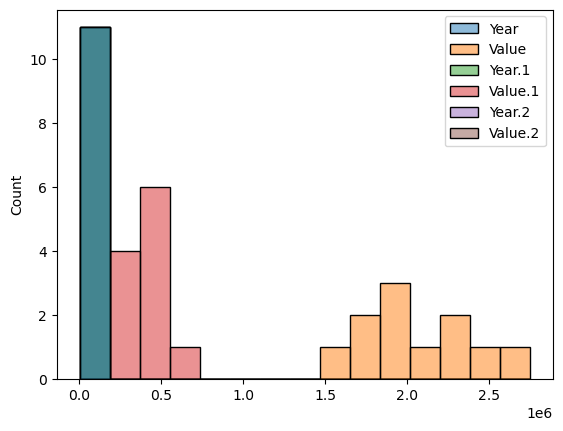

In [408]:
sns.histplot(FAOSTAT_data);

### seaborn.boxplot
I drew a box plot to show the distributions by category.

A boxplot (or box and whisker plot) shows the distribution of quantitative data across variables or levels of a categorical variable in a way that facilitates comparisons. The box shows the quartiles of the dataset, while the horizontal lines expand to show the rest of the distribution, except for the points identified as "outliers" using a method that is a function of interquartile range.
The Pandas library plays a pretty important role.
  I visualized the combat stats of all Pokémon using a boxplot.


<AxesSubplot:>

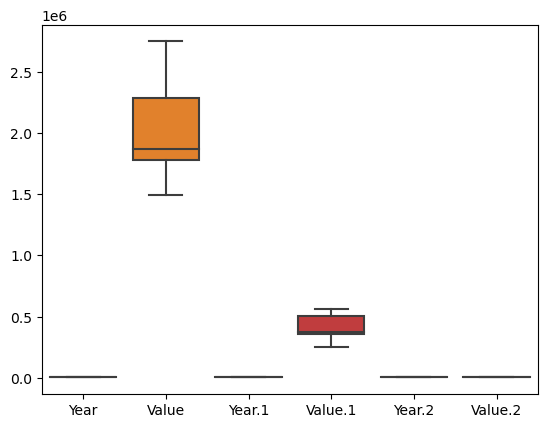

In [409]:
sns.boxplot(data = FAOSTAT_data)

I used a ton of variables without changing the box width or position:

### Heat Map
I visualized heatmaps in matrix style FAO_data.
I plotted rectangular data as a color-coded matrix.
This is an Axis level function and will plot the heatmap to the currently active
Axes if none is supplied to the ax argument. 
Unless cbar is False or a separate Axes is provided to cbar_ax,
part of this Axes field will be taken and used to draw a colormap.

<AxesSubplot:>

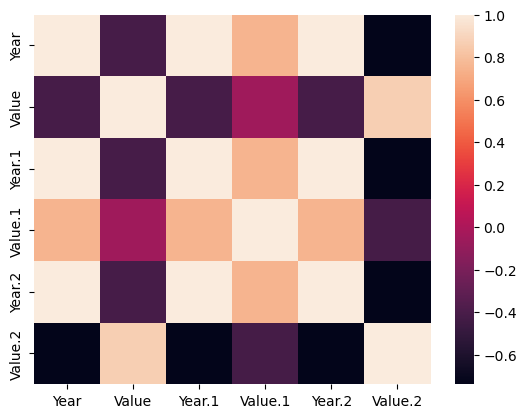

In [410]:
corr = FAOSTAT_data.corr()

sns.heatmap(corr)

In [411]:
print("Columns in Data..:\n",Land_data.columns)

Columns in Data..:
 Index(['Area', 'Year', 'Hectares', 'Area.1', 'Year.1', 'Hectares.1', 'Area.2',
       'Year.2', 'Hectares.2'],
      dtype='object')


In [412]:
print("Shape of Data..:\n",Land_data.shape)

Shape of Data..:
 (11, 9)


In [413]:
print("Columns in Datas are Types..:\n",Land_data.dtypes)

Columns in Datas are Types..:
 Area           object
Year            int64
Hectares        int64
Area.1         object
Year.1          int64
Hectares.1      int64
Area.2         object
Year.2          int64
Hectares.2    float64
dtype: object


In [414]:
Land_data.head()

,Area,Year,Hectares,Area.1,Year.1,Hectares.1,Area.2,Year.2,Hectares.2
0,Germany,2010,16700,Ireland,2010,4568,Luxembourg,2010,131.04
1,Germany,2011,16719,Ireland,2011,4555,Luxembourg,2011,131.27
2,Germany,2012,16664,Ireland,2012,4533,Luxembourg,2012,131.42
3,Germany,2013,16697,Ireland,2013,4477,Luxembourg,2013,130.88
4,Germany,2014,16725,Ireland,2014,4466,Luxembourg,2014,130.99


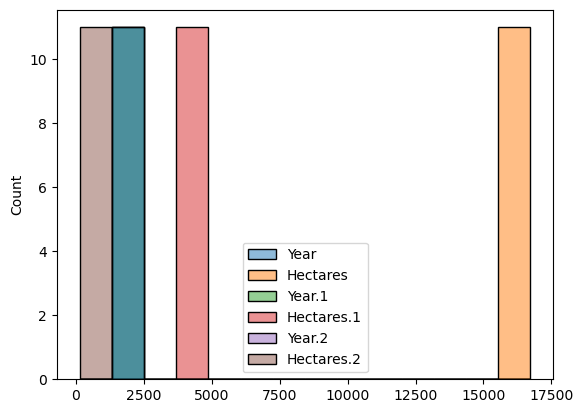

In [415]:
sns.histplot(Land_data);

<AxesSubplot:>

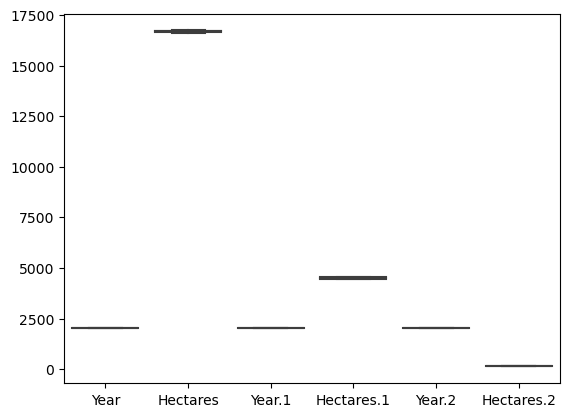

In [416]:
sns.boxplot(data = Land_data)

<AxesSubplot:>

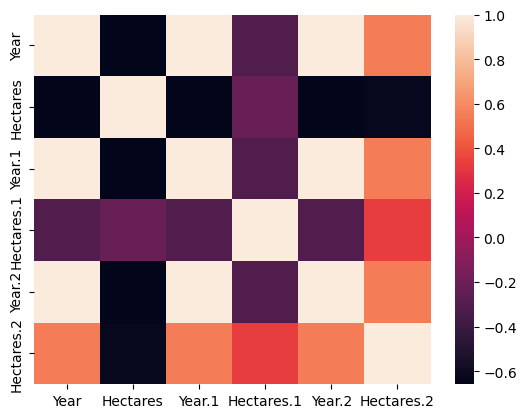

In [417]:
corr = Land_data.corr()

sns.heatmap(corr)

In [418]:
Germany = pd.read_csv('Germany_data.csv')
Germany.head()

,Year,Barley,Wheat,Potatoes
0,2010,1709755,4725090,2230136
1,2011,2245973,6555489,2961768
2,2012,2750363,6305585,1781483
3,2013,2513116,6743066,3171025
4,2014,2331890,6230084,2371665


In [419]:
print("Columns in Data..:\n",Germany.columns)

Columns in Data..:
 Index(['Year', 'Barley', 'Wheat', 'Potatoes'], dtype='object')


In [420]:
print("Shape of Data..:\n",Germany.shape)

Shape of Data..:
 (11, 4)


In [421]:
print("Columns in Datas are Types..:\n",Germany.dtypes)

Columns in Datas are Types..:
 Year        int64
Barley      int64
Wheat       int64
Potatoes    int64
dtype: object


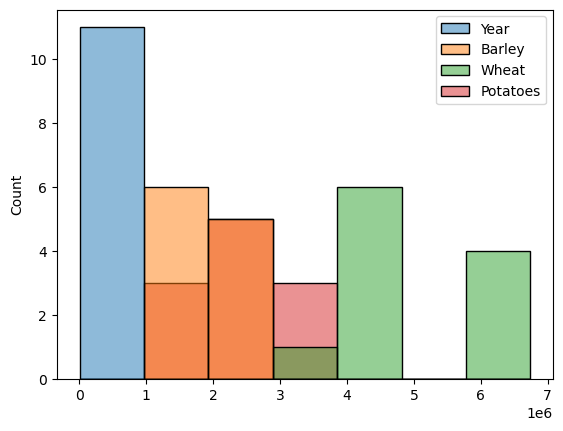

In [422]:
sns.histplot(Germany);

<AxesSubplot:>

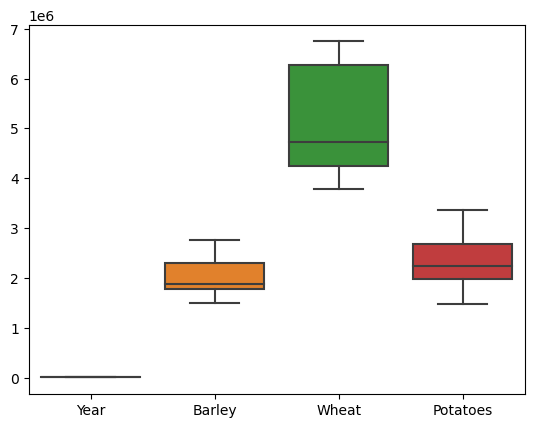

In [423]:
sns.boxplot(data = Germany)

<AxesSubplot:>

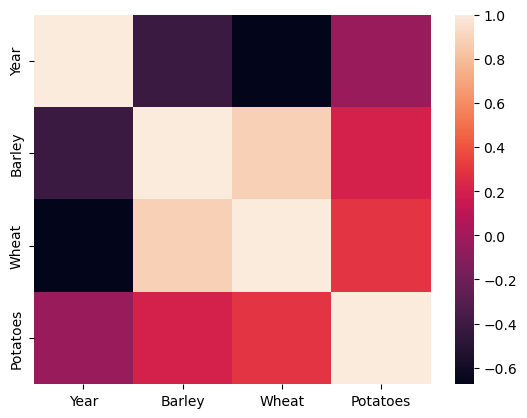

In [424]:
corr = Germany.corr()

sns.heatmap(corr)

In [425]:
Luxembourg= pd.read_csv('Luxembourg_data.csv')
Luxembourg.head()

,Year,Barley,Wheat,Potatoes
0,2010,7137,17579,9147
1,2011,8611,19386,8127
2,2012,9754,23486,10060
3,2013,8292,20262,8868
4,2014,7940,15450,5240


In [426]:
print("Columns in Data..:\n",Luxembourg.columns)

Columns in Data..:
 Index(['Year', 'Barley', 'Wheat', 'Potatoes'], dtype='object')


In [427]:
print("Shape of Data..:\n",Luxembourg.shape)

Shape of Data..:
 (11, 4)


In [428]:
print("Columns in Datas are Types..:\n",Luxembourg.dtypes)

Columns in Datas are Types..:
 Year        int64
Barley      int64
Wheat       int64
Potatoes    int64
dtype: object


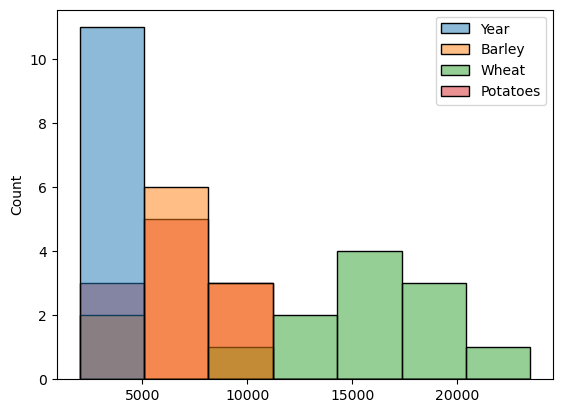

In [429]:
sns.histplot(Luxembourg);

<AxesSubplot:>

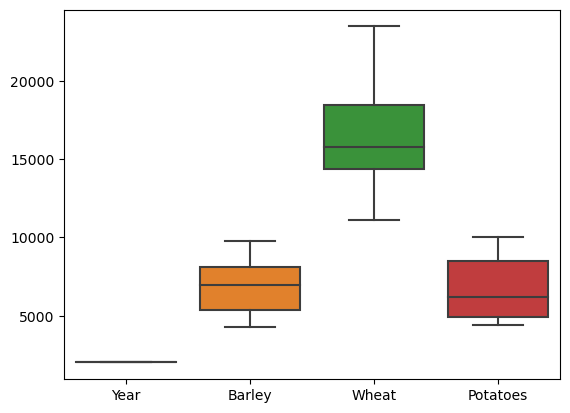

In [430]:
sns.boxplot(data = Luxembourg)

<AxesSubplot:>

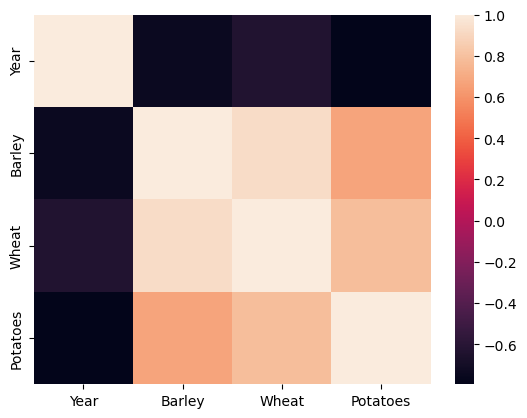

In [431]:
corr = Luxembourg.corr()

sns.heatmap(corr)

In [432]:
Ireland= pd.read_csv('Ireland_data.csv')
Ireland.head()

,Year,Barley,Wheat,Potatoes
0,2010,254794,140984,419600
1,2011,372922,211259,356100
2,2012,343886,200646,232000
3,2013,365145,113201,410100
4,2014,537874,187072,340257


In [433]:
print("Columns in Data..:\n",Ireland.columns)

Columns in Data..:
 Index(['Year', 'Barley', 'Wheat', 'Potatoes'], dtype='object')


In [434]:
print("Shape of Data..:\n",Ireland.shape)

Shape of Data..:
 (11, 4)


In [435]:
print("Columns in Datas are Types..:\n",Ireland.dtypes)

Columns in Datas are Types..:
 Year        int64
Barley      int64
Wheat       int64
Potatoes    int64
dtype: object


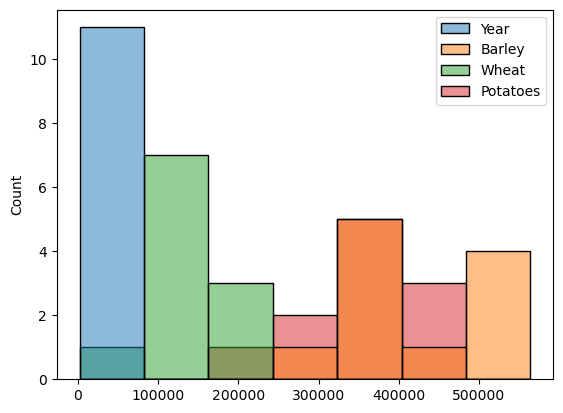

In [436]:
sns.histplot(Ireland);

<AxesSubplot:>

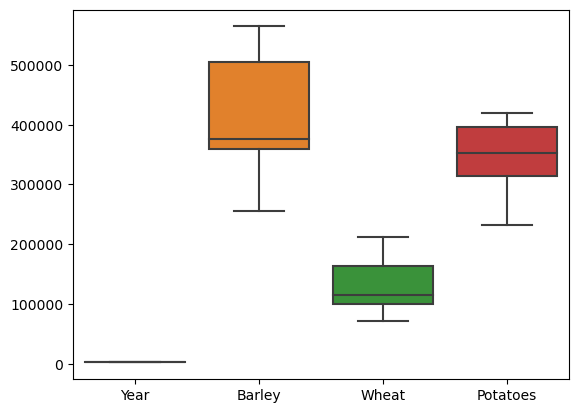

In [437]:
sns.boxplot(data = Ireland)

<AxesSubplot:>

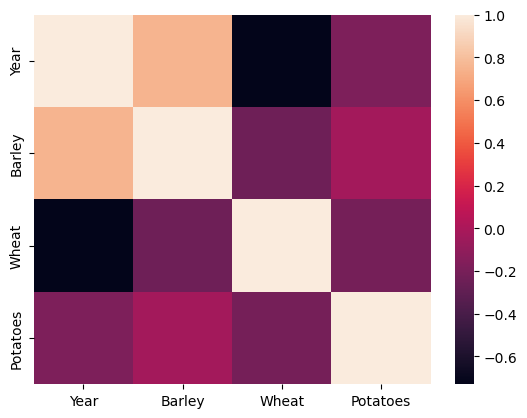

In [438]:
corr = Ireland.corr()

sns.heatmap(corr)

#### T-test for to compare Ireland(Barley)-Germany(Barley) 

In [439]:
stats.ttest_ind(a=Ireland['Barley'],b=Germany['Barley'], equal_var=True)

Ttest_indResult(statistic=-13.410589064204617, pvalue=1.8625862726162457e-11)

#### T-test for to compare Ireland(Barley)-Luxembourg(Barley)

In [440]:
stats.ttest_ind(a=Ireland['Barley'],b=Luxembourg['Barley'], equal_var=True)

Ttest_indResult(statistic=14.102150714221876, pvalue=7.469067941347705e-12)

#### T-test for to compare Ireland(Wheat)-Germany(Wheat)

In [441]:
stats.ttest_ind(a=Ireland['Wheat'],b=Germany['Wheat'], equal_var=True)

Ttest_indResult(statistic=-14.58358824623137, pvalue=4.039855325794968e-12)

#### T-test for to compare Ireland(Wheat)-Luxembourg(Wheat)

In [442]:
stats.ttest_ind(a=Ireland['Wheat'],b=Luxembourg['Wheat'], equal_var=True)

Ttest_indResult(statistic=8.217242794877963, pvalue=7.68650344090604e-08)

#### T-test for to compare Germany(Barley)-Luxembourg(Barley)

In [443]:
stats.ttest_ind(a=Germany['Barley'],b=Luxembourg['Barley'], equal_var=True)

Ttest_indResult(statistic=17.376680347051913, pvalue=1.5525852790026173e-13)

#### T-test for to compare Germany(Wheat)-Luxembourg(Wheat)

In [444]:
stats.ttest_ind(a=Germany['Wheat'],b=Luxembourg['Wheat'], equal_var=True)

Ttest_indResult(statistic=14.936911457332549, pvalue=2.600967215140873e-12)

#### T-test for to compare Germany(Potatoes)-Luxembourg(Potatoes)

In [445]:
stats.ttest_ind(a=Germany['Potatoes'],b=Luxembourg['Potatoes'], equal_var=True)

Ttest_indResult(statistic=13.047331132384837, pvalue=3.056838900131058e-11)

### Wilcoxon Test

If we have  𝑛  datapoints, the ranks can go from 1 to  𝑛 . Some of these were positive differences, some were negative.

In total there are  2𝑛  different ways these ranks could be split between the positive and negative differences.

In each of these possible splits, we can then sum the ranks for the positive and the ranks for the negative differences separately.

Wilcoxon Test for Ireland(Barley)-Germany(Barley)

In [446]:
stats.wilcoxon(Ireland['Barley'], Germany['Barley'])

WilcoxonResult(statistic=0.0, pvalue=0.0009765625)

Wilcoxon Test for Ireland(Wheat)-Germany(Wheat)

In [447]:
stats.wilcoxon(Ireland['Wheat'], Germany['Wheat'])

WilcoxonResult(statistic=0.0, pvalue=0.0009765625)

Wilcoxon Test for Ireland(Potatoes)-Germany(Potatoes)

In [448]:
stats.wilcoxon(Ireland['Potatoes'], Germany['Potatoes'])

WilcoxonResult(statistic=0.0, pvalue=0.0009765625)

Wilcoxon Test for Germany(Barley)-Luxembourg(Barley)

In [449]:
stats.wilcoxon(Germany['Barley'], Luxembourg['Barley'])

WilcoxonResult(statistic=0.0, pvalue=0.0009765625)

Wilcoxon Test for Germany(Wheat)-Luxembourg(Wheat)

In [450]:
stats.wilcoxon(Germany['Wheat'], Luxembourg['Wheat'])

WilcoxonResult(statistic=0.0, pvalue=0.0009765625)

Wilcoxon Test for Germany(Potatoes)-Luxembourg(Potatoes)

In [451]:
stats.wilcoxon(Germany['Potatoes'], Luxembourg['Potatoes'])

WilcoxonResult(statistic=0.0, pvalue=0.0009765625)

Wilcoxon Test for Ireland(Barley)-Luxembourg(Barley)

In [452]:
stats.wilcoxon(Ireland['Potatoes'], Luxembourg['Potatoes'])

WilcoxonResult(statistic=0.0, pvalue=0.0009765625)

In [453]:
stats.wilcoxon(Ireland['Barley'], Luxembourg['Barley'])

WilcoxonResult(statistic=0.0, pvalue=0.0009765625)

Wilcoxon Test for Ireland(Wheat)-Luxembourg(Wheat)

In [454]:
stats.wilcoxon(Ireland['Wheat'], Luxembourg['Wheat'])

WilcoxonResult(statistic=0.0, pvalue=0.0009765625)

Wilcoxon Test for Ireland(Potatoes)-Luxembourg(Potatoes)

## Z-Test

#### Z-Test for Ireland(Barley)-Germany(Barley)

In [455]:
z_test, p_value = ztest(Ireland["Barley"],Germany["Barley"])

In [456]:
print("z-test:", z_test , "-", "p value:", p_value)

z-test: -13.410589064204617 - p value: 5.242079070873298e-41


#### Z-Test for Ireland(Wheat)-Germany(Wheat)

In [457]:
z_test, p_value = ztest(Ireland["Wheat"],Germany["Wheat"])

In [458]:
print("z-test:", z_test , "-", "p value:", p_value)

z-test: -14.58358824623137 - p value: 3.572356248035075e-48


#### Z-Test for Ireland(Potatoes)-Germany(Potatoes)

In [459]:
z_test, p_value = ztest(Ireland["Potatoes"],Germany["Potatoes"])

In [460]:
print("z-test:", z_test , "-", "p value:", p_value)

z-test: -11.103367537579865 - p value: 1.2080462977615694e-28


#### Z-Test for Ireland(Barley)-Luxembourg(Barley)

In [461]:
z_test, p_value = ztest(Ireland["Barley"],Luxembourg["Barley"])

In [462]:
print("z-test:", z_test , "-", "p value:", p_value)

z-test: 14.102150714221876 - p value: 3.6836954027479865e-45


#### Z-Test for Ireland(Wheat)-Luxembourg(Wheat)

In [463]:
z_test, p_value = ztest(Ireland["Wheat"],Luxembourg["Wheat"])

In [464]:
print("z-test:", z_test , "-", "p value:", p_value)

z-test: 8.217242794877963 - p value: 2.0823521343261577e-16


#### Z-Test for Ireland(Potatoes)-Luxembourg(Potatoes)

In [465]:
z_test, p_value = ztest(Ireland["Potatoes"],Luxembourg["Potatoes"])

In [466]:
print("z-test:", z_test , "-", "p value:", p_value)

z-test: 18.692155399273712 - p value: 5.734860041190219e-78


#### Z-Test for Germany(Barley)-Luxembourg(Barley)

In [467]:
z_test, p_value = ztest(Germany["Barley"],Luxembourg["Barley"])

In [468]:
print("z-test:", z_test , "-", "p value:", p_value)

z-test: 17.376680347051913 - p value: 1.2392247767199418e-67


#### Z-Test for Germany(Wheat)-Luxembourg(Wheat)

In [469]:
z_test, p_value = ztest(Germany["Wheat"],Luxembourg["Wheat"])

In [470]:
print("z-test:", z_test , "-", "p value:", p_value)

z-test: 14.936911457332549 - p value: 1.8955954389629974e-50


#### Z-Test for Germany(Potatoes)-Luxembourg(Potatoes)

In [471]:
z_test, p_value = ztest(Germany["Potatoes"],Luxembourg["Potatoes"])

In [472]:
print("z-test:", z_test , "-", "p value:", p_value)

z-test: 13.047331132384839 - p value: 6.581274335792339e-39


## Chi Square Test 
# ANOVA 

In [473]:
from scipy.stats import chisquare
from scipy.stats import f_oneway

In [474]:
# Anova for Ireland-Germany
stat, p = f_oneway(Ireland["Barley"],Germany["Barley"])

# Let's print the test result
print("Statistics=%.3f, p=%.3f" % (stat, p))

# Let's evaluate the p value
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is a significant difference between the median values ​​(H0 is rejected)")

Statistics=179.844, p=0.000
There is a significant difference between the median values ​​(H0 is rejected)


In [475]:
# Anova for Ireland-Germany
stat, p = f_oneway(Ireland["Wheat"],Germany["Wheat"])

# Let's print the test result
print("Statistics=%.3f, p=%.3f" % (stat, p))

# Let's evaluate the p value
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is a significant difference between the median values ​​(H0 is rejected)")

Statistics=212.681, p=0.000
There is a significant difference between the median values ​​(H0 is rejected)


In [476]:
# Anova for Ireland-Germany
stat, p = f_oneway(Ireland["Potatoes"],Germany["Potatoes"])

# Let's print the test result
print("Statistics=%.3f, p=%.3f" % (stat, p))

# Let's evaluate the p value
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is a significant difference between the median values ​​(H0 is rejected)")

Statistics=123.285, p=0.000
There is a significant difference between the median values ​​(H0 is rejected)


In [477]:
# Anova for Ireland-Luxembourg
stat, p = f_oneway(Ireland["Barley"],Luxembourg["Barley"])

# Let's print the test result
print("Statistics=%.3f, p=%.3f" % (stat, p))

# Let's evaluate the p value
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is a significant difference between the median values ​​(H0 is rejected)")

Statistics=198.871, p=0.000
There is a significant difference between the median values ​​(H0 is rejected)


In [478]:
# Anova for Ireland-Luxembourg
stat, p = f_oneway(Ireland["Wheat"],Luxembourg["Wheat"])

# Let's print the test result
print("Statistics=%.3f, p=%.3f" % (stat, p))

# Let's evaluate the p value
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is a significant difference between the median values ​​(H0 is rejected)")

Statistics=67.523, p=0.000
There is a significant difference between the median values ​​(H0 is rejected)


In [479]:
# Anova for Ireland-Luxembourg
stat, p = f_oneway(Ireland["Potatoes"],Luxembourg["Potatoes"])

# Let's print the test result
print("Statistics=%.3f, p=%.3f" % (stat, p))

# Let's evaluate the p value
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is a significant difference between the median values ​​(H0 is rejected)")

Statistics=349.397, p=0.000
There is a significant difference between the median values ​​(H0 is rejected)


In [480]:
# Anova for Germany-Luxembourg
stat, p = f_oneway(Germany["Barley"],Luxembourg["Barley"])

# Let's print the test result
print("Statistics=%.3f, p=%.3f" % (stat, p))

# Let's evaluate the p value
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is a significant difference between the median values ​​(H0 is rejected)")

Statistics=301.949, p=0.000
There is a significant difference between the median values ​​(H0 is rejected)


In [481]:
# Anova for Germany-Luxembourg
stat, p = f_oneway(Germany["Wheat"],Luxembourg["Wheat"])

# Let's print the test result
print("Statistics=%.3f, p=%.3f" % (stat, p))

# Let's evaluate the p value
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is a significant difference between the median values ​​(H0 is rejected)")

Statistics=223.111, p=0.000
There is a significant difference between the median values ​​(H0 is rejected)


In [482]:
# Anova for Germany-Luxembourg
stat, p = f_oneway(Germany["Potatoes"],Luxembourg["Potatoes"])

# Let's print the test result
print("Statistics=%.3f, p=%.3f" % (stat, p))

# Let's evaluate the p value
alpha = 0.05
if p > alpha:
    print("No significant difference between median values ​​(H0 cannot be rejected)")
else:
    print("There is a significant difference between the median values ​​(H0 is rejected)")

Statistics=170.233, p=0.000
There is a significant difference between the median values ​​(H0 is rejected)


In [483]:
Land_data_value=Land_data.iloc[:,2:3]


In [484]:
 Ld=pd.concat((FAOSTAT_data,Land_data_value), axis=1)
    

In [485]:
Ld

,Area,Year,Value,Area.1,Year.1,Value.1,Area.2,Year.2,Value.2,Hectares
0,Germany,2010,1709755,Ireland,2010,254794,Luxembourg,2010,7137,16700
1,Germany,2011,2245973,Ireland,2011,372922,Luxembourg,2011,8611,16719
2,Germany,2012,2750363,Ireland,2012,343886,Luxembourg,2012,9754,16664
3,Germany,2013,2513116,Ireland,2013,365145,Luxembourg,2013,8292,16697
4,Germany,2014,2331890,Ireland,2014,537874,Luxembourg,2014,7940,16725
5,Germany,2015,1870174,Ireland,2015,352333,Luxembourg,2015,6994,16731
6,Germany,2016,1495623,Ireland,2016,375665,Luxembourg,2016,4249,16659
7,Germany,2017,1667490,Ireland,2017,506004,Luxembourg,2017,4943,16687
8,Germany,2018,1873095,Ireland,2018,446585,Luxembourg,2018,6344,16645
9,Germany,2019,2035995,Ireland,2019,564352,Luxembourg,2019,5376,16666


In [486]:
Ld.head()

,Area,Year,Value,Area.1,Year.1,Value.1,Area.2,Year.2,Value.2,Hectares
0,Germany,2010,1709755,Ireland,2010,254794,Luxembourg,2010,7137,16700
1,Germany,2011,2245973,Ireland,2011,372922,Luxembourg,2011,8611,16719
2,Germany,2012,2750363,Ireland,2012,343886,Luxembourg,2012,9754,16664
3,Germany,2013,2513116,Ireland,2013,365145,Luxembourg,2013,8292,16697
4,Germany,2014,2331890,Ireland,2014,537874,Luxembourg,2014,7940,16725


In [487]:
list_germany=[Persons_Germany,Germany_hectares,FAO_Germany]
df_Germany = pd.concat((list_germany),axis=1)
list_ireland=[Persons_Ireland,Ireland_hectares,FAO_Ireland]
df_Ireland = pd.concat((list_ireland),axis=1)
list_luxembourg= [Persons_Luxembourg,Luxembourg_hectares,FAO_Luxembourg]
df_Luxembourg = pd.concat((list_luxembourg),axis=1)

In [488]:
df_Germany

,Persons(1000),Hectares,Value
0,81325.090,16700,1709755
1,81423.378,16719,2245973
2,81545.565,16664,2750363
3,81680.591,16697,2513116
4,81858.825,16725,2331890
5,82073.226,16731,1870174
6,82331.423,16659,1495623
7,82624.374,16687,1667490
8,82896.696,16645,1873095
9,83148.141,16666,2035995


# Decision Tree

In [489]:
# Germany
X = df_Germany.iloc[:,0:2]
y = df_Germany.iloc[:,2:3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [490]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [491]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 3, random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [492]:
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

     1495623       0.00      0.00      0.00       0.0
     1667490       0.00      0.00      0.00       0.0
     1848525       0.00      0.00      0.00       1.0
     1873095       0.00      0.00      0.00       0.0
     2035995       0.00      0.00      0.00       1.0
     2331890       0.00      0.00      0.00       1.0
     2750363       0.00      0.00      0.00       1.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



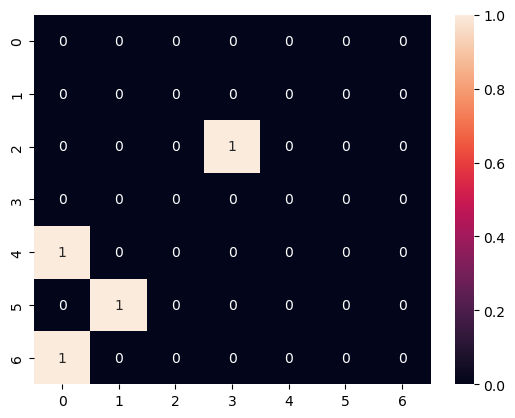

In [493]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

In [494]:
from sklearn import metrics                           
warnings.filterwarnings('ignore') # We can suppress the warnings

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.0


[Text(0.3333333333333333, 0.875, 'X[0] <= -1.212\ngini = 0.857\nsamples = 7\nvalue = [1, 1, 1, 1, 1, 1, 1]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0, 0]'),
 Text(0.5, 0.625, 'X[1] <= -1.377\ngini = 0.833\nsamples = 6\nvalue = [1, 1, 0, 1, 1, 1, 1]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0, 0]'),
 Text(0.6666666666666666, 0.375, 'X[1] <= -0.638\ngini = 0.8\nsamples = 5\nvalue = [1, 1, 0, 1, 0, 1, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.75\nsamples = 4\nvalue = [0, 1, 0, 1, 0, 1, 1]')]

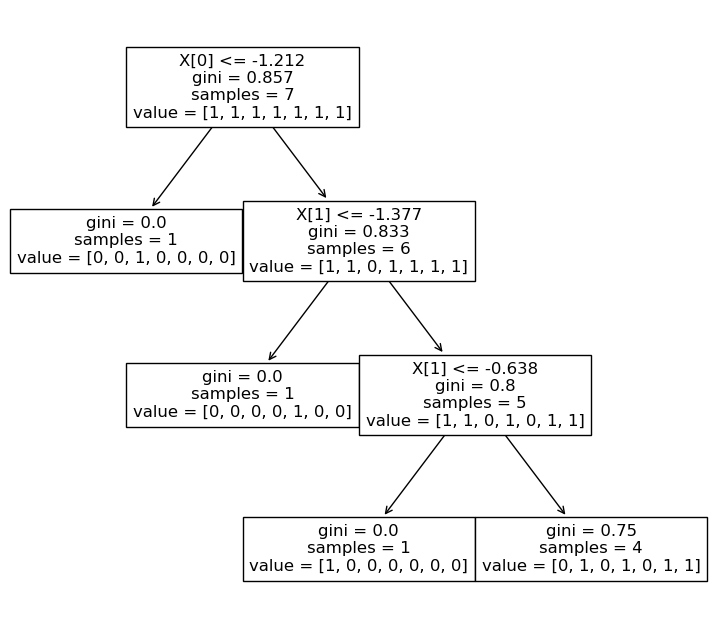

In [495]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,8))

from sklearn import tree

tree.plot_tree(classifier.fit(X_train, y_train)) 

### Linear Regression for Germany

In [496]:
# Linear Regression 

lr=LinearRegression()
lr.fit(X_train,y_train)
predict_LR= lr.predict(X_test)
print(predict_LR)



independent_val = sm.add_constant(X)
model_linear = sm.OLS(y,X).fit()
print(model_linear.summary())

[[2011460.05996277]
 [1644524.04279015]
 [1962091.22155979]
 [1477721.44690713]]
                                 OLS Regression Results                                
Dep. Variable:                  Value   R-squared (uncentered):                   0.974
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              166.0
Date:                Fri, 06 Jan 2023   Prob (F-statistic):                    7.89e-08
Time:                        20:12:43   Log-Likelihood:                         -155.56
No. Observations:                  11   AIC:                                      315.1
Df Residuals:                       9   BIC:                                      315.9
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err    

### Decision Tree for Ireland

In [497]:
# Ireland
X = df_Ireland.iloc[:,0:2]
y = df_Ireland.iloc[:,2:3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [498]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [499]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 3, random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [500]:
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

      343886       0.00      0.00      0.00       1.0
      365145       0.00      0.00      0.00       0.0
      375665       0.00      0.00      0.00       0.0
      502396       0.00      0.00      0.00       1.0
      537874       0.00      0.00      0.00       1.0
      564352       0.00      0.00      0.00       1.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



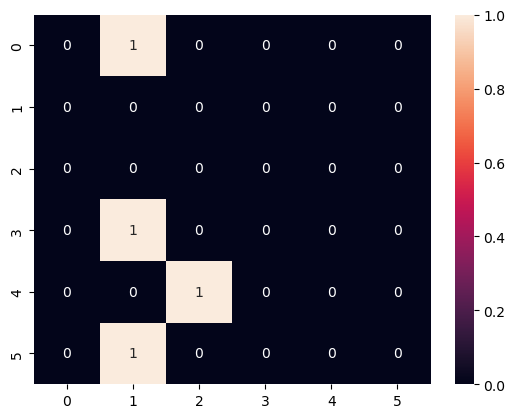

In [501]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

In [502]:
from sklearn import metrics                           
warnings.filterwarnings('ignore') # We can suppress the warnings

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.0


[Text(0.3333333333333333, 0.875, 'X[0] <= -1.188\ngini = 0.857\nsamples = 7\nvalue = [1, 1, 1, 1, 1, 1, 1]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0]'),
 Text(0.5, 0.625, 'X[1] <= -1.166\ngini = 0.833\nsamples = 6\nvalue = [0, 1, 1, 1, 1, 1, 1]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0, 0]'),
 Text(0.6666666666666666, 0.375, 'X[1] <= -0.658\ngini = 0.8\nsamples = 5\nvalue = [0, 0, 1, 1, 1, 1, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.75\nsamples = 4\nvalue = [0, 0, 1, 1, 0, 1, 1]')]

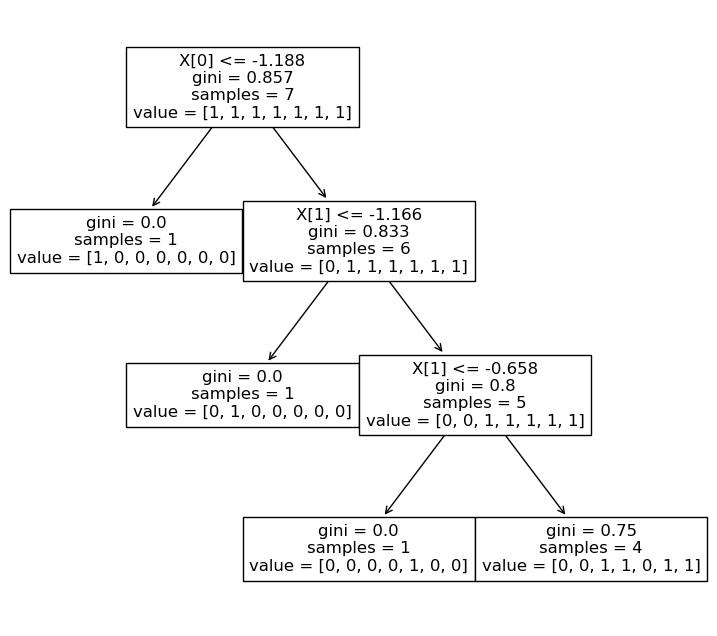

In [503]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,8))

from sklearn import tree

tree.plot_tree(classifier.fit(X_train, y_train)) 

### Linear Regresion for Ireland

In [504]:
# Linear Regression 
lr=LinearRegression()
lr.fit(X_train,y_train)
predict_LR= lr.predict(X_test)
print(predict_LR)



independent_val = sm.add_constant(X)
model_linear = sm.OLS(y,X).fit()
print(model_linear.summary())

[[355854.16099881]
 [512112.68735084]
 [330612.28279384]
 [538520.10892147]]
                                 OLS Regression Results                                
Dep. Variable:                Value.1   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              204.1
Date:                Fri, 06 Jan 2023   Prob (F-statistic):                    3.18e-08
Time:                        20:12:44   Log-Likelihood:                         -137.20
No. Observations:                  11   AIC:                                      278.4
Df Residuals:                       9   BIC:                                      279.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err      

### Decision Tree for Luxembourg

In [505]:
# Luxembourg
X = df_Luxembourg.iloc[:,0:2]
y = df_Luxembourg.iloc[:,2:3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [506]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [507]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth = 3, random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [508]:
y_pred = classifier.predict(X_test)

              precision    recall  f1-score   support

        4943       0.00      0.00      0.00       0.0
        5359       0.00      0.00      0.00       1.0
        5376       0.00      0.00      0.00       1.0
        7940       0.00      0.00      0.00       1.0
        8292       0.00      0.00      0.00       0.0
        9754       0.00      0.00      0.00       1.0

    accuracy                           0.00       4.0
   macro avg       0.00      0.00      0.00       4.0
weighted avg       0.00      0.00      0.00       4.0



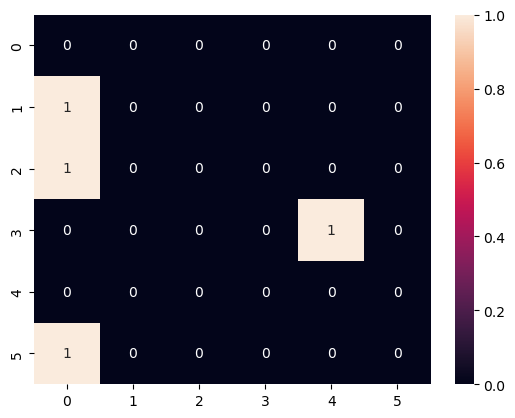

In [509]:
# Calculate cm by calling a method named as 'confusion_matrix'
cm = confusion_matrix(y_test, y_pred)

# Call a method heatmap() to plot confusion matrix
sns.heatmap(cm, annot = True)

# print the classification_report based on y_test and y_predict
print(classification_report(y_test, y_pred))

In [510]:
from sklearn import metrics                           
warnings.filterwarnings('ignore') # We can suppress the warnings

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.0


[Text(0.3333333333333333, 0.875, 'X[0] <= -1.336\ngini = 0.857\nsamples = 7\nvalue = [1, 1, 1, 1, 1, 1, 1]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0, 0]'),
 Text(0.5, 0.625, 'X[1] <= -1.291\ngini = 0.833\nsamples = 6\nvalue = [1, 1, 1, 1, 0, 1, 1]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0, 0]'),
 Text(0.6666666666666666, 0.375, 'X[1] <= -0.363\ngini = 0.8\nsamples = 5\nvalue = [0, 1, 1, 1, 0, 1, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 1, 0]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.75\nsamples = 4\nvalue = [0, 1, 1, 1, 0, 0, 1]')]

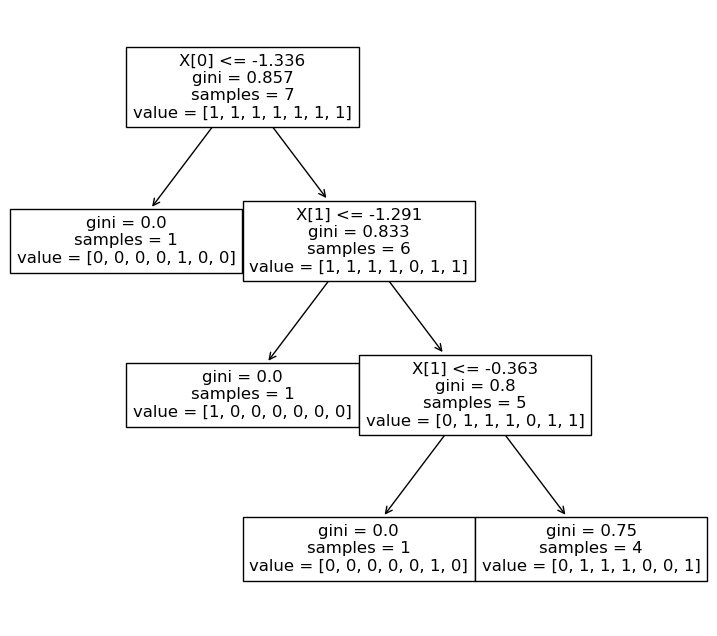

In [511]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,8))

from sklearn import tree

tree.plot_tree(classifier.fit(X_train, y_train)) 

### Linear Regresion for Luxembourg

In [512]:
# Linear Regression 

lr=LinearRegression()
lr.fit(X_train,y_train)
predict_LR= lr.predict(X_test)
print(predict_LR)



independent_val = sm.add_constant(X)
model_linear = sm.OLS(y,X).fit()
print(model_linear.summary())

[[6481.38080775]
 [5886.68827007]
 [8431.83058718]
 [6929.48347502]]
                                 OLS Regression Results                                
Dep. Variable:                Value.2   R-squared (uncentered):                   0.978
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              195.8
Date:                Fri, 06 Jan 2023   Prob (F-statistic):                    3.82e-08
Time:                        20:12:44   Log-Likelihood:                         -92.147
No. Observations:                  11   AIC:                                      188.3
Df Residuals:                       9   BIC:                                      189.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t   